## Exploratory Data Analysis

Now that our data is cleaned. Lets visualize it

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly

In [2]:
abdata = pd.read_csv('../Data/abtesting_cleaned.csv', index_col = 0)

In [3]:
#abdata['date'] = pd.to_datetime(abdata['date'])

In [4]:
abdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8077 entries, 0008ef63-77a7-448b-bd1e-075f42c55e39 to fffbb9ff-568a-41a5-a0c3-6866592f80d8
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experiment   8077 non-null   object
 1   date         8077 non-null   object
 2   hour         8077 non-null   int64 
 3   device_make  8077 non-null   object
 4   platform_os  8077 non-null   int64 
 5   browser      8077 non-null   object
 6   success      8077 non-null   int64 
 7   no_reponse   8077 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 567.9+ KB


In [5]:
abdata.head()

,experiment,date,hour,device_make,platform_os,browser,success,no_reponse
auction_id,,,,,,,,
0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,1
000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,1
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,0
00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,1
001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


Our data tracks user id, which experiemnt they belong in, the hour and date in which they saw the ad, the device they used, platform id, and which browser they used. 

The success columns tracks if the user click on the yes button after the ad completed. 0 if the user did not response or clicked no, 1 if the user click on yes

The no_reponse column tracks if the user did not click on yes or no after the ad completed. 0 if the user clicked on yes or no, 1 if the user neither click yes or no. 

Possible combination of cases: 
if success is 0 and no_response is 0 - user clicked on no after the ad

if success is 1 and no_response is 0 - user clicked on yes after the ad

if success is 0 and no_response is 1 - user neither clicked on yes or no

if success is 1 and no_response is 1 - not possible in our implementation.

In [6]:
#lets look at our experiment and control sample
sample_group = pd.DataFrame(abdata['experiment'].value_counts()/len(abdata))

our sample is roughly spilt down the middle

In [7]:
sample_group

,experiment
control,0.504024
exposed,0.495976


<BarContainer object of 2 artists>

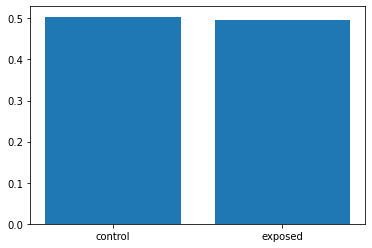

In [8]:
plt.bar(sample_group.index,sample_group['experiment'])

In [9]:
#lets look at when people accessed the ad
abdata['date'].value_counts()

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

In [10]:
abdata['hour'].value_counts()

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

Looks like most people saw the ad around 3pm and on July 3rd 2020. The data is a little messy and spread out between two columns. Lets merge these and see what our results are.

In [11]:
#abdata['hour'] = pd.to_datetime(abdata['hour'], format = '%H')

In [23]:
abdata['hour'] = abdata['hour'].apply(str)
abdata['hour'] = abdata['hour']+':00:00'

In [24]:
abdata

,experiment,date,hour,device_make,platform_os,browser,success,no_reponse,Date
auction_id,,,,,,,,,
0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-10 8
000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-07 10
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2:00:00,E5823,6,Chrome Mobile WebView,0,0,2020-07-05 2
00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15:00:00,Samsung SM-A705FN,6,Facebook,0,1,2020-07-03 15
001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-03 15
...,...,...,...,...,...,...,...,...,...
ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-05 7
ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-03 15
ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-04 9


In [25]:
abdata['Date'] = abdata['date'].str.cat(abdata['hour'],sep=" ")

In [26]:
abdata.head()

,experiment,date,hour,device_make,platform_os,browser,success,no_reponse,Date
auction_id,,,,,,,,,
0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-10 8:00:00
000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-07 10:00:00
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2:00:00,E5823,6,Chrome Mobile WebView,0,0,2020-07-05 2:00:00
00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15:00:00,Samsung SM-A705FN,6,Facebook,0,1,2020-07-03 15:00:00
001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15:00:00,Generic Smartphone,6,Chrome Mobile,0,1,2020-07-03 15:00:00


In [28]:
abdata['Date'] = pd.to_datetime(abdata['Date'])

In [30]:
abdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8077 entries, 0008ef63-77a7-448b-bd1e-075f42c55e39 to fffbb9ff-568a-41a5-a0c3-6866592f80d8
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   experiment   8077 non-null   object        
 1   date         8077 non-null   object        
 2   hour         8077 non-null   object        
 3   device_make  8077 non-null   object        
 4   platform_os  8077 non-null   int64         
 5   browser      8077 non-null   object        
 6   success      8077 non-null   int64         
 7   no_reponse   8077 non-null   int64         
 8   Date         8077 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 631.0+ KB


In [38]:
pd.DataFrame(abdata['Date'].value_counts())

,Date
2020-07-03 15:00:00,1546
2020-07-08 20:00:00,126
2020-07-08 15:00:00,125
2020-07-08 18:00:00,116
2020-07-08 16:00:00,115
...,...
2020-07-07 23:00:00,2
2020-07-05 23:00:00,2
2020-07-03 21:00:00,1
2020-07-03 19:00:00,1


Our suspicions were correct. Most users accessed the ad on July 3rd at 3pm.

In [46]:
abdata.groupby('experiment')['success'].value_counts()

experiment  success
control     0          3807
            1           264
exposed     0          3698
            1           308
Name: success, dtype: int64

In [48]:
success_data = pd.DataFrame(abdata.groupby('experiment')['success'].value_counts())

<AxesSubplot:xlabel='experiment,success'>

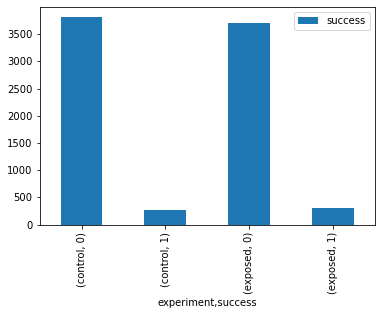

In [49]:
success_data.plot(kind = 'bar')

<AxesSubplot:xlabel='experiment', ylabel='success'>

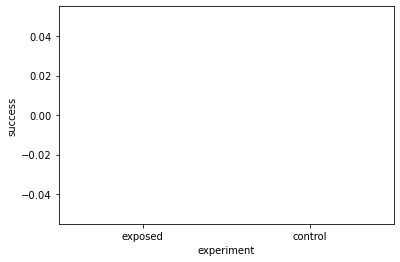

In [56]:
sns.barplot(data= abdata, x = 'experiment', y = 'success'].value_counts())